# Lab 8: Define and Solve an ML Problem of Your Choosing

In [35]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [36]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I selected the AirBnB dataset.
2. I will be predicting Price
3. This is a supervised (We are using labelled data) regression (Our label is numeric) problem.
4. Our features will be the 4 features most correlated with the price label. These are [accommodates, bedrooms, beds, bathrooms].
5. This Machine Learning model is important as it can demonstrate if the data that the company curretly collects can actually contribute to profits (our label is price). If the model concludes that the quality of the dataset is weak, a model like this can demonstrate what data a company should focus on collecting. Furthermore, if the model concludes that strong correlation between its features and its label, this indicates that the company can utilize the model's predictive behaviors to predict if a given listing on AirBnb is likely to sell at a given price, which can be beneficial to helping influence more churn and profit for the company, which evidently creates value.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [62]:
# Find features with highest correlation with label
corr_matrix = round(df.corr(), 5)
corrs = corr_matrix['price']
# Sort features by correlation
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted
# Select 4 most correlated
top_4_correlated = list(corrs_sorted[1:5].index)
df_corrs = df[top_4_correlated].copy()
df_corrs

,accommodates,bedrooms,beds,bathrooms
0,1,1.329708,1.0,1.0
1,3,1.000000,3.0,1.0
2,4,2.000000,2.0,1.5
3,2,1.000000,1.0,1.0
4,1,1.000000,1.0,1.0
...,...,...,...,...
28017,2,1.000000,1.0,1.0
28018,6,2.000000,2.0,1.0
28019,2,1.000000,1.0,2.0
28020,3,1.000000,2.0,1.0


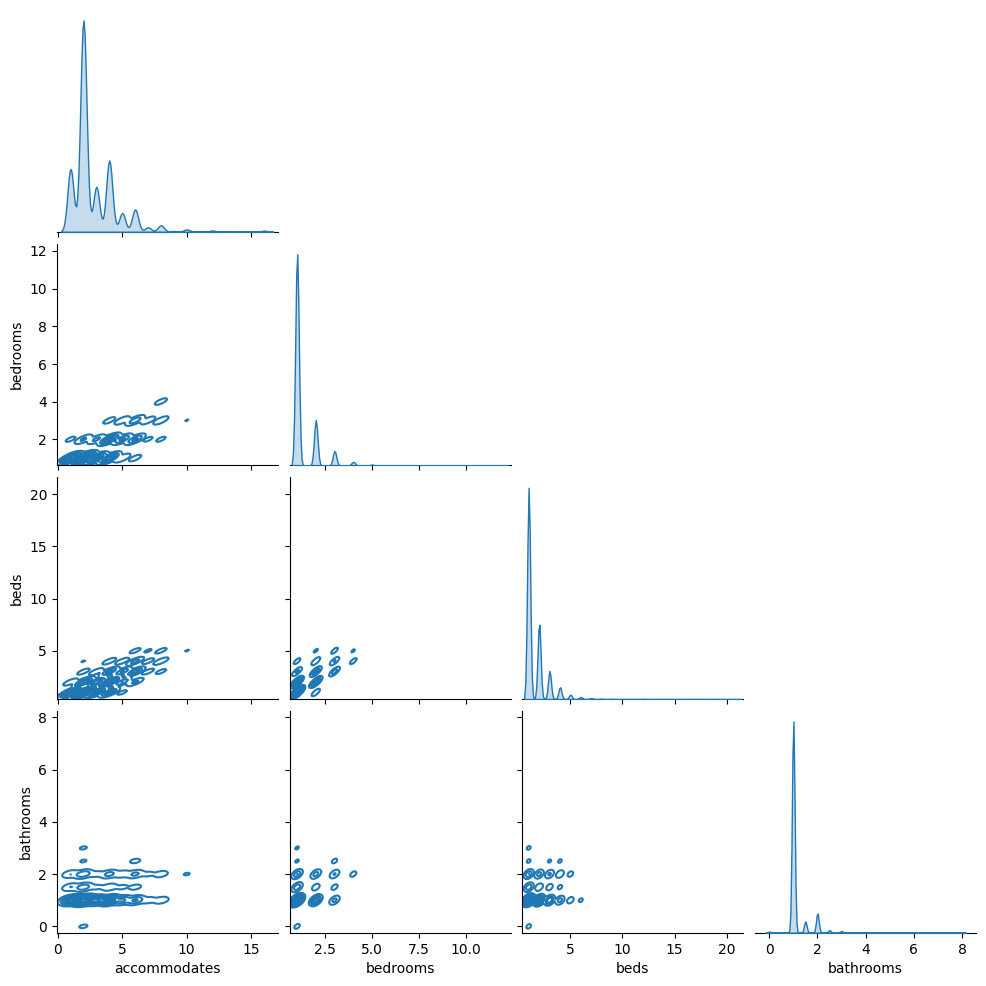

In [39]:
sns.pairplot(data=df_corrs, kind = 'kde', corner=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Evidently, training a model with ~40 features will create a model that has less accuracy (due to having wider spread of predictions and more integration of redundant/useless data that has no correlation with the label). Thus, we algorithmically calculate what features have the highest correlation with price (the highest correlation is ~0.5), and select the first 4 (as there is a difference of over 20% between the 4th and 5th highest correlated features). We remove the other features. Thus, our feature list consists of 4 columns to allow for faster and more effective training of our models.
2. Given that we are working on a regression model, to help reduce the effects of outliers on our model, we apply winsorization on our price label to reduce noise in our model's predictions. Normally, we would also apply one-hot encoding to convert categorical data into parsable-binary data, however given the fact that our data preparation primarily consists of deleting the majority of the columns of the dataset, this is not the case (All of the model's features are numeric already). Additionally, under regular circumstances, we would have to full in null/missing values on the dataset with the mean of the rest of the column if such columns existed as part of our most correlated features. However, this is not the case, so it can be ignored in this case.
3. Given that we are solving for a numeric value (implying a Regression approach), to determine which model is best for our Machine Learning problem, we will apply several Ensemble models (and Stacking to see the effects of averaged regression models such as Linear Regression and Decision Trees) and compare their performances using RMSE and R2. The Ensemble models which will be trained are Gradient-Boosting Decision Trees and Random Forest.
4. The general approach to finding and training the best model is the following (further outlined in the code below). Given the processed dataset, we will split the dataset into training and testing using a 0.3/0.7 split. Then, we will train each model twice, once to test parameters, and a second time to find and apply the optimal parameters for the model regressors. From there, we will compare the RMSE and R2 of each model, where we will look for lower RMSEs closer to 0, and R2s closer to 1. From there, we can determine which model is best suited to find price predictions.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [40]:
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

# Data Preparation
- One Hot Encoding
- Winsorization
- Handling Missing Data

In [41]:
# !!! Data Preparation !!!

# Vectorize some text data for one-hot encoding
text_to_encode = df[['neighbourhood_group_cleansed', 'room_type']]
print(text_to_encode.nunique())
# One Hot Encode
encoder = OneHotEncoder(sparse_output=False)
df_enc = pd.DataFrame(encoder.fit_transform(text_to_encode))
# Replace Old Columns
df_enc.columns = encoder.get_feature_names_out(text_to_encode.columns)
df.drop(columns = text_to_encode, inplace=True)
df = df.join(df_enc)

# Check Results
df.columns

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64


Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [42]:
# !!! Data Preparation !!!

# Winsorize the label to handle outliers
df['label_price'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

# Check Results
(df['price'] - df['label_price']).unique()

array([  0.,   1., 101.,  51.,  -1., 100.,  58.,  81.,  26.,  96.,  15.,
        25.,  41.,   6.,   7.,  46.,  83.,  99.,  44.,  43.,  93.,  78.,
        71.,   2.,  87.,  86.,  50.,  12.])

In [43]:
# !!! Data Preparation !!!

# Handle Missing Data by Replacing with Mean
nan_count = np.sum(df.isnull(), axis = 0)
to_impute = (nan_count != 0) & ((df.dtypes == 'int64') | (df.dtypes == 'float64'))
# Check Results
df.columns[to_impute]

actual_impute = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']
for col in actual_impute:
    # No need to create dummy variables in this instance
    # df[col + '_na'] = df[col].isnull()
    df[col].fillna(np.mean(df[col]), inplace=True)
# Check Results
for col in actual_impute:
    print("{} missing values count :{}".format(col, np.sum(df[col].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [44]:
# !!! Data Preparation !!!

# Remove all other string features to avoid errors later
strings_to_delete = df.select_dtypes(include=['object']).columns
df.drop(columns = strings_to_delete, inplace=True)

# Check Results
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [45]:
# !!! Data Preparation !!!

# Crazily enough though, we will further eliminate irrelavant features
df = df.loc[:, top_4_correlated + ['price']]

In [46]:
df.head(10)

,accommodates,bedrooms,beds,bathrooms,price
0,1,1.329708,1.000000,1.0,150.0
1,3,1.000000,3.000000,1.0,75.0
2,4,2.000000,2.000000,1.5,275.0
3,2,1.000000,1.000000,1.0,68.0
4,1,1.000000,1.000000,1.0,75.0
5,2,1.000000,1.629556,1.5,98.0
6,3,1.329708,1.000000,1.0,89.0
7,1,1.000000,1.000000,1.0,62.0
8,1,1.000000,1.000000,1.0,90.0
9,4,1.000000,2.000000,1.0,199.0


# Model Building & Model Optimization
- Create Labelled Examples
- Create Training & Test Data
- Evaluate multiple models to select best fit:
    - Specifics:
        - Gauge Model Performance using RSME and R2
        - Tune Hyperparameters using GridSearch
    - Models:
        - Regression:
            - Stacking
            - Linear Regression
            - Decision Trees
        - Ensemble:
            - Gradient-Boosted Decision Trees
            - Random Forest

In [47]:
# !!! Model Building !!!

# Create Labeled Examples
X = df.drop(columns = 'price', axis=1)
y = df['price']

# Create Training, Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [48]:
# !!! Model Building !!!

# Decision Tree: Initial Training
max_depth = [4, 8]
min_samples_leaf = [25, 50]
dt_param_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, dt_param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
dt_grid_search = dt_grid.fit(X_train, y_train)
print('Done!')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Done!


In [49]:
# !!! Model Optimization !!!

# Decision Tree: Determine Best Params, Retrain
# rmse_DT = -1 * dt_grid_search.best_score_
# print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT))
dt_best_params = dt_grid_search.best_params_
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)
print('Done!')

Done!


In [50]:
# !!! Model Building !!!

# Decision Tree: Test the Model
y_dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_dt_pred, squared=False))
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 10.89118189569679
[DT] R2: 0.3341705720514069


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
# !!! Model Building !!!

# Logistic Regression: Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Logistic Regression: Testing
y_lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred, squared=False))
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 11.04028915405259
[LR] R2: 0.29695239542592433


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
# !!! Model Building !!!

# Stacking: Training
estimators = [("DT", DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])),
              ("LR", LinearRegression())]
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('DT',
                               DecisionTreeRegressor(max_depth=8,
                                                     min_samples_leaf=25)),
                              ('LR', LinearRegression())])

In [53]:
# !!! Model Building !!!

# Stacking: Test the Model
stacking_pred = stacking_model.predict(X_test)
stack_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))
stack_r2 = r2_score(y_test, stacking_pred)

print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))

Root Mean Squared Error: 118.55242356722584
R2: 0.33490479934056927


In [54]:
# !!! Model Building !!!

# Gradient-Boosted Decision Tree: Initial Training
max_depth = [2, 4]
n_estimators = [25, 100, 300]
gbdt_param_grid = {'max_depth': max_depth, 'n_estimators': n_estimators}
gbdt_regressor = GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_regressor, gbdt_param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)
print('Done!')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Done!


In [55]:
# !!! Model Optimization !!!

# Gradient Boosted Decision Tree: Determine Best Params, Retrain
gbdt_best_params = gbdt_grid_search.best_params_
gbdt_best_params
gbdt_model = GradientBoostingRegressor(max_depth = gbdt_best_params['max_depth'], n_estimators = gbdt_best_params['n_estimators'])
gbdt_model.fit(X_train, y_train)
print('Done!')

Done!


In [56]:
# !!! Model Building !!!

# Gradient Boosted Decision Tree: Test the Model
y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = np.sqrt(mean_squared_error(y_test, y_gbdt_pred, squared=False))
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[DT] R2: {0}'.format(gbdt_r2))

[DT] Root Mean Squared Error: 10.874553774200034
[DT] R2: 0.33822749201131175


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
# !!! Model Building !!!

# Random Forest: Initial Training
max_depth = [16, 32]
n_estimators = [100, 300]
rf_param_grid = {'max_depth': max_depth, 'n_estimators': n_estimators}
rf_regressor = RandomForestRegressor()
rf_grid = GridSearchCV(rf_regressor, rf_param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
rf_grid_search = rf_grid.fit(X_train, y_train)
print('Done!')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Done!


In [58]:
# !!! Model Optimization !!!

# Random Forest: Determine Best Params, Retrain
rf_best_params = rf_grid_search.best_params_
rf_best_params
rf_model = RandomForestRegressor(max_depth = rf_best_params['max_depth'], n_estimators = rf_best_params['n_estimators'])
rf_model.fit(X_train, y_train)
print('Done!')

Done!


In [59]:
# !!! Model Building !!!

# Random Forest: Test the Model
y_rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred, squared=False))
rf_r2 = r2_score(y_test, y_rf_pred)

print('[DT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[DT] R2: {0}'.format(gbdt_r2))

[DT] Root Mean Squared Error: 10.874553774200034
[DT] R2: 0.33822749201131175


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


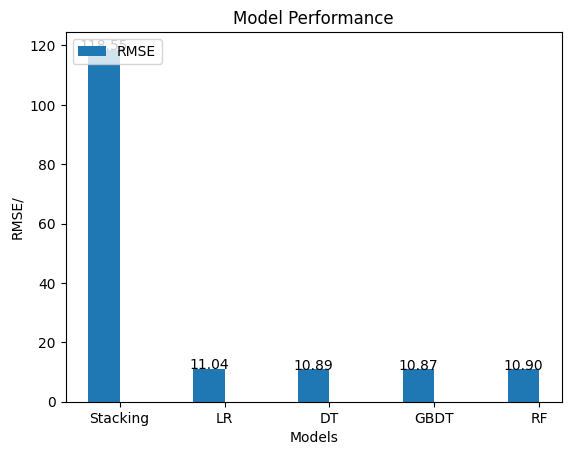

In [60]:
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
rg = np.arange(5)
width = 0.3
plt.bar(rg, RMSE_Results, width, label="RMSE")
# plt.bar(rg+width, R2_Results, width, label='R2')
labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/")
# plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)

for i in range(len(rg)):
    plt.text(rg[i], RMSE_Results[i] + 0.01, f'{RMSE_Results[i]:.2f}', ha='center')
    
plt.show()

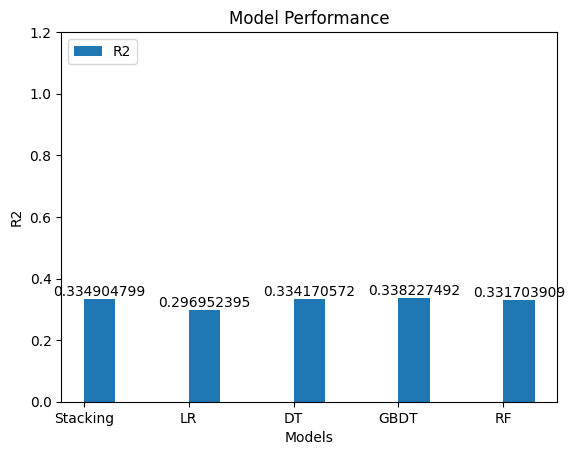

In [61]:
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
rg = np.arange(5)
width = 0.3
# plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("R2")
plt.ylim([0,1.2])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)

for i in range(len(rg)):
    plt.text(rg[i] + width, R2_Results[i] + 0.01, f'{R2_Results[i]:.9f}', ha='center')

plt.show()

# Conclusion:
Gradient Boosted Decision Trees are likely the best suited model to predict price. This is because GBDT out of all the selected models has both the lowest RMSE and the highest/closest to 1 R2. It is important to note that these models, based on their low R2s and high RSMEs do not perform well. However, this could possibly be attributed to the fact that the most correlated feature had a correlation value of ~0.5 percent, meaning that generally speaking, the accuracy of the model could only be as accurate as the data itself, resulting in the bad performance. 